# Plotten

In der Physik (und auch allgemein in der Wissenschaft) ist es oft von Vorteil die Daten graphisch darzustellen. Häufig in der Form eines Graphs. In Python kann dies mit dem Matplotlib Paket leicht umgesetzt werden. Nach dem Importiern schauen wir uns einige Eigenschaften an.

In [6]:
import numpy as np
import matplotlib.pyplot as plt #Die Plot-Bibliothek
#Befehl um Graphen direkt im Jupyter anzuzeigen (statt externem Speichern)
%matplotlib inline 

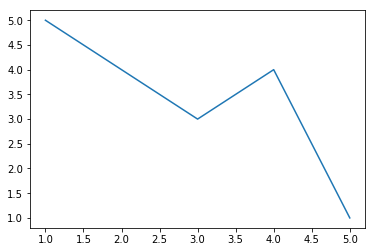

In [7]:
## nun definieren wir zwei arrays

x=np.array([1,2,3,4,5])
y=np.array([5,4,3,4,1])

plt.plot(x,y)

Nun können wir mit der graphischen Darstellung rumspielen. Z.B. Vergrößern oder nur Punkte anzeigen.

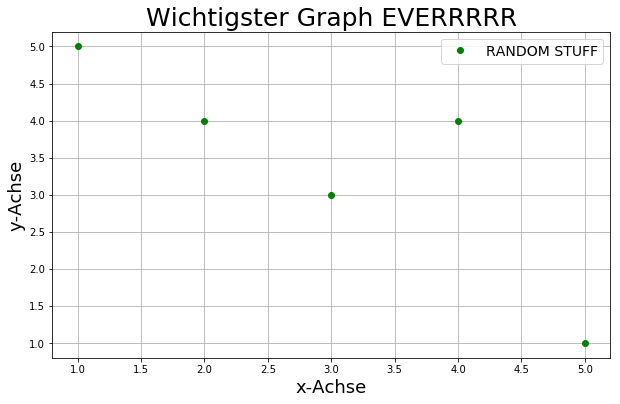

In [8]:
plt.figure(figsize=(10,6)) ##Erstellt den Rahmen- also die Achsen und deren Längen. 
plt.plot(x,y,'og', label='RANDOM STUFF') ##Plottet die Daten, 'og' bedeutet große punkte in grün, label ist für die legende
plt.title('Wichtigster Graph EVERRRRR', fontsize=25) #Erstelle ein Titel in passender Größe
plt.xlabel('x-Achse', fontsize=18) #Beschriftung der x Achse
plt.ylabel('y-Achse', fontsize=18) # Beschriftung der y Achse
plt.grid() #Gitter
plt.legend(fontsize=14) # Legende

Man kann verschiedene Sachen plotten wie z.B Funktionen. Bevor wir das machen, lernen wir noch eine Numpy Funktion kennen. Linspace erzeugt ein Array aus Zahlen in einem gewählten Intervall mit gleichem Abstand (linear) zwischen den Schritten (Anzahl eurer Wahl).
Die Syntax lautet
`x = np.linspace(anfang,ende,schritte)`

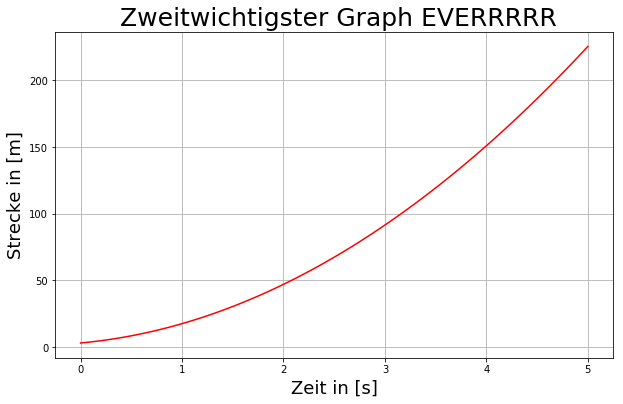

In [16]:
x=np.linspace(0,5,100)

def func(t,a,v_0,x_0):
    return 1/2*a*t**2+v_0*x+x_0 #klassische Bewegungsgleichung

plt.figure(figsize=(10,6)) ##Erstelle den Rahmen- also die Achsen
plt.plot(x,func(x,15,7,3),'-r') ##Plottet die Daten, '-r' bedeutet rote Linie. Statt '-' geht auch 'o' '.' '+' 
plt.title(' Zweitwichtigster Graph EVERRRRR', fontsize=25) #Erstelle einen Titel in passender Größe
plt.xlabel('Zeit in [s]', fontsize=18) #Beschriftung der x Achse
plt.ylabel('Strecke in [m]', fontsize=18) # Beschriftung der y Achse
plt.grid() #Gitter


## Funktionen Fitten

Wir haben gesehen, dass wir anhand numerische Daten Graphen erstellen können. Wie wir wissen folgen verschiedene physikalische Prozesse auch verschiedenen physikalischen Gesetzen, die in der Form von mathematischen Formeln beschrieben werden können. Um nun die Ergebnisse einer Messung auszuwerten muss man häufig eine Funktion an die gemessenen Daten anpassen. Die angepassten Parametern liefern das gesuchte Resultat. Wir werden erstmal das Fitten (Anpassen) an sich kennenlernen und dannach an einem praktischen Beispiel üben.

Um eine Funktion zu fitten benutzen wir wieder Scipy. In scipy befindet sich die Funktion curve_fit. Diese Funktion passt eine parameter abhängige Funktion an gegebene Daten mithilfe des sogenannten 'Levenberg-Marquardt Algorithmus' an. Was das genau bedeutet ist für uns gerade unwichtig, Interessierte können das auf Wikipedia nachlesen.

Im folgenden Beispiel erzeugen wir Daten mit ein bisschen Rauschen (Streuung), die mehr oder weniger einer Sinuskurve folgen. Da wir nun nicht wissen wie genau diese Sinuskurve aussieht, fitten wir die Funktion 

$$f(x)=a\cdot\sin{(bx+c)}+d$$.

Die Parameter a,b,c,d heißen Fit-Parameter.

<Container object of 3 artists>

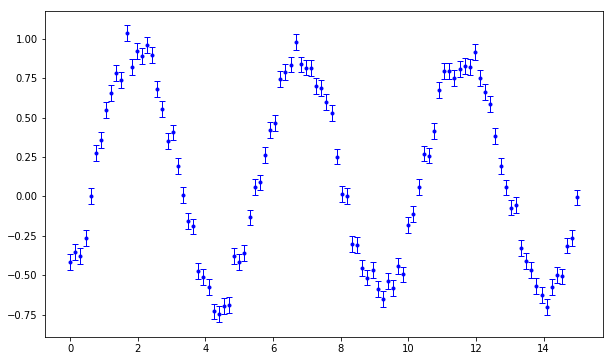

In [17]:
#erstmal importieren wir das Paket
from scipy.optimize import curve_fit

## nun lasst uns daten mit ein bisschen rauschen erzeugen. np.random erzeugt Zufallszahlen.

x = np.linspace(0,15,100)
y = 0.8*np.sin(1.3*x-1) + 0.003*np.random.uniform(0., 100., 100)
err =0.05*np.ones(x.shape)




#nun erstellen wir einen Plot der Daten

plt.figure(figsize=(10,6))
#errorbar ist eine Funktion um daten mit Fehlerangaben zu plotten
plt.errorbar(x,y,err,fmt='.b', capsize=3, elinewidth=1) 


#Wir sehen, dass die Daten einen Sinus-ähnlichen Verlauf haben

Amplitude= 0.7737779741482168 +- 0.010474304247319571
Freq= 1.3004960954675768 +- 0.003055919088596975
Phase -0.9834706746276557 +- 0.02601144107914599
Offset= 0.14536414752502055 +- 0.007432109086894718


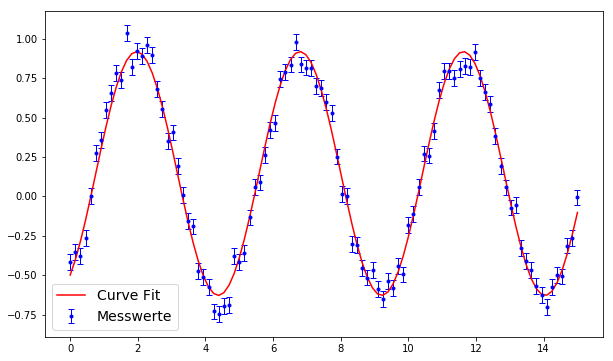

In [18]:
# Nun definieren wir die Funktion, die wir anpassen wollen, mit allen möglichen Parametern

def sin(x,a,b,c,d):
    return a*np.sin(b*x+c)+d

# wir definieren die Optimale Parameter für die Funktion.
# popt gibt uns ein Array mit den optimalen Werten für die Parameter a,b,c,d wieder.
# pcov stellt den Fehler dar (nur eine grobe Beschreibung, eigentlich ist pcov etwas anders).

popt,pcov =curve_fit(sin,x,y,sigma=err)


# Plottet die ürsprunglichen Daten
plt.figure(figsize=(10,6))
plt.errorbar(x,y,err,fmt='.b', capsize=3, elinewidth=1, label='Messwerte')

# Jetzt plotten wir die angepasste Kurve mithilfe der optimalen Parameter
plt.plot(x,sin(x,*popt),'r', label='Curve Fit')
plt.legend(fontsize=14)


# Man kann auch die Optimale Werte wiedergeben lassen, um Rechnungen mit ihnen Durchzuführen
Amplitude=popt[0]
Amplitude_err=np.sqrt(pcov[0][0])
Freq=popt[1]
Freq_err=np.sqrt(pcov[1][1])
Phase=popt[2]
Phase_err=np.sqrt(pcov[2][2])
Offset=popt[3]
Offset_err=np.sqrt(pcov[3][3])

print('Amplitude=',Amplitude,'+-',Amplitude_err)
print('Freq=',Freq,'+-',Freq_err)
print('Phase',Phase,'+-',Phase_err)
print('Offset=',Offset,'+-',Offset_err)


## Einfaches physikalisches Bsp - Freier Fall

Nun testen wir alles was wir gelernt haben mit einem einfachen Beispiel. Wir betrachten den freien Fall. Ihr habt durch Messungen das folgende dataset erhalten.
Ihr habt leider die Zeit in Minuten gemessen. 


| $x$ [m]  |$\Delta x$ [m] |$t$[min]| $\Delta t$ [min]|
|----------|:-------------:|-------:|----------------:|
| 0        |  0.1          |  0     |     0.0003      |
| 0.5      |    0.1        |0.00546 |      0.0003     |
| 1        | 0.1           |0.00775 |      0.0003     |
|1.5       |           0.1 |0.00970 |       0.0003    |
|2         |         0.1   |  0.011 |      0.0003     |
|2.5       |      0.1      |  0.0123|       0.0003    |
|3         |   0.1         |  0.0132|       0.0003    |
|3.5       |      0.1      |  0.0142|       0.0003    |
|4         |     0.1       |  0.0151|       0.0003    |
|4.5       |      0.1      |  0.0162|       0.0003    |
|5         |      0.1      |  0.0164|       0.0003    |


Man kann den freien Fall mit dem folgenden Gesetz beschreiben

$$x=\frac{1}{2}gt^2.$$ 

##### Eure Aufgaben sind:  
- Erstmal Arrays mit euren Daten zu erstellen  
- Das Zeit-Array in Sekunden umrechnen  
- Die Rohdaten mit Fehlern plotten  
- Mithilfe der curve_fit Funktion die Erdbeschleunigung bestimmen (Optional: mit Fehler Angabe)

### Hinweis: 
Da ihr auch nicht $t$ sondern $t^2$ plottet, ist der Fehler dafür nicht einfach $(\Delta t)^2$ sondern 

$$\Delta (t^2) = 2t\Delta t$$ 

Dies kommt aus dem Gaußschen Fehlerfortpflanzungsgesetz, das hier nicht diskutiert wird. Dies ist aber nur relevant für die graphische Darstellung der Daten und nicht für die Rechnung selbst.

### Weiterer Hinweis:

Wenn ihr Hilfe braucht bei allem, was Fehlerrechnung angeht, könnt ihr mich zu jeder Zeit fragen, da dies kein expliziter Teil der Einführung ist

In [ ]:
#hier eure Lösung